In [48]:
import numpy as np
import pandas as pd
import astroquery
from astroquery.vizier import Vizier
from astroquery.gaia import Gaia
import astropy 
import astropy.units as u
from astropy.coordinates import SkyCoord
import os
import matplotlib.pyplot as plot

In [49]:
#Quering eROSITA data
file = os.chdir("/home/abhi/Desktop/eROSITA/")
data = pd.read_csv("e-ROSITA NEW RESULTS - EROSITA+GAIA (1).csv")
source_id = data["id"].to_numpy()
RA = data["RA (deg)"].to_numpy()
DEC = data["DEC (deg)"].to_numpy()

In [50]:
#Getting the corresponding GAIA sources
coord_eROSITA = SkyCoord(ra = RA, dec = DEC, unit=(u.deg, u.deg))
len(coord_eROSITA)

2165

In [51]:
#Getting the GAIA sources ID 
Vizier.VIZIER_SERVER = "vizier.cds.unistra.fr" 
Vizier.ROW_LIMIT = 1  
gaia_catalog = "I/355/gaiadr3"  
matched_gaia_ids = []

result = Vizier.query_region(coord_eROSITA, radius=3*u.arcsec, catalog=gaia_catalog)
result

TableList with 1 tables:
	'0:I/355/gaiadr3' with 58 column(s) and 2165 row(s) 

In [52]:
len(result[0])

2165

In [53]:
#Getting the Gaia IDs
g_source_id = []
gaia_source_id = []

for i in range(0,2165):
    g_source_id.append(result[0][i][3]) 
       
for j in g_source_id:
    gaia_source_id.append(str(j))
#print(gaia_source_id)
cross_d = np.column_stack((source_id,gaia_source_id))
cross_d

array([['1eRASS J053651.5+232604', '3404492276276148608'],
       ['1eRASS J153549.3-065726', '4397045027810215424'],
       ['1eRASS J153223.1-083201', '6318307633024991232'],
       ...,
       ['1eRASS J234746.9-651724', '6485480370209220096'],
       ['1eRASS J233842.7-650940', '6389473110815481472'],
       ['1eRASS J235758.2-503130', '6523519418083625472']], dtype=object)

In [54]:
print(gaia_source_id)

['3404492276276148608', '4397045027810215424', '6318307633024991232', '6318055496968793344', '4112610784274894208', '4918091463521598592', '4707482485122305536', '5027921748739493632', '4710627809932009344', '4910693055937045888', '5012668876761210240', '5022972468944971648', '4714563374364671872', '4743944043046490240', '4743636248509810944', '4644868351640807808', '5119953517683718400', '4617143036371460864', '4701058897674276736', '4695093944014478080', '4745195905754074496', '4741722617241539456', '5078976609103251456', '5181896326300508672', '5179985546890000000', '5100634995304618496', '4832642230174329088', '5055436752347254016', '4653893040002306432', '5084149398994695168', '4681704263210424960', '4884511622495522688', '4778320269792962176', '4778915109878774912', '4891725758804030208', '4628229751415342976', '3198281103870644864', '3180844498721017856', '3184047620908591616', '3291643148740384128', '4876684474095606400', '4655312509517124224', '3391618889196357248', '297312280

In [87]:
#Getting the orbital periods
Vizier.ROW_LIMIT = 1
Vizier.VIZIER_SERVER = "vizier.cds.unistra.fr" 
catalog_nss = "I/357/tboes"
periods = []

for i in gaia_source_id:
    result = Vizier.query_constraints(catalog=catalog_nss, Source=i)
    if result:
        period = result[0][0]['Per']
        periods.append((i, period))

In [61]:
periods

[]

In [15]:
matched_eROSITA = []

for i in range(0,len(cross_d)):
    for j in range(0,len(periods)):
        if cross_d[i][1] == periods[j][0]:
            matched_eROSITA.append(cross_d[i][0])
        
matched_eROSITA

['1eRASS J041359.0-313239',
 '1eRASS J045023.9+171209',
 '1eRASS J020938.1-483558',
 '1eRASS J024413.0-361826',
 '1eRASS J040540.6+034147',
 '1eRASS J045102.5+145817',
 '1eRASS J045035.4-410249',
 '1eRASS J051642.6-084215',
 '1eRASS J064205.6-380015',
 '1eRASS J064342.7-395152',
 '1eRASS J065046.9-144431',
 '1eRASS J065937.1-382412',
 '1eRASS J070532.5-403824',
 '1eRASS J094230.1-593226',
 '1eRASS J122033.9-753928',
 '1eRASS J120139.3-785918',
 '1eRASS J141700.9-054024']

In [17]:
final_data = np.column_stack((matched_eROSITA,periods))
df_final = pd.DataFrame(final_data)
df_final.to_csv("IB_types_4.txt")

/tmp/ipykernel_11784/576478468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sr_class_new[sr_class_new  == "SS_IB"] = 0
/tmp/ipykernel_11784/576478468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sr_class_new[sr_class_new  == "YSO"] = 1
/tmp/ipykernel_11784/576478468.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sr_class_new[sr_class_new  == "IB"] = 2
/tmp/ipykernel_11784/576478468.py:8: SettingWithCopyWarning: 
A va

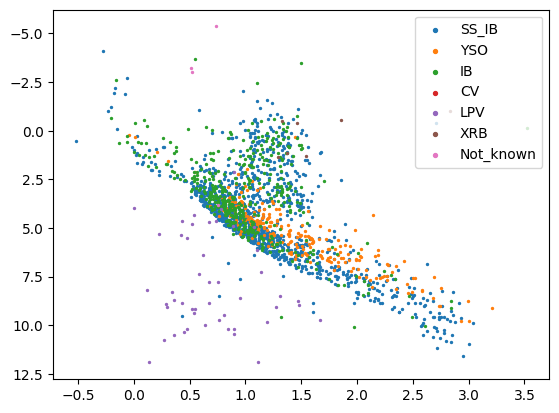

In [193]:
#Plotting bp-rp Absolute G  plot
class_1 = ["SS_IB", "YSO", "IB", "CV", "LPV", "XRB", "Not_known"]
sr_class_new = data["New source class"]

sr_class_new[sr_class_new  == "SS_IB"] = 0
sr_class_new[sr_class_new  == "YSO"] = 1
sr_class_new[sr_class_new  == "IB"] = 2
sr_class_new[sr_class_new  == "CV"] = 3
sr_class_new[sr_class_new  == "LPV"] = 4
sr_class_new[sr_class_new  == "XRB"] = 5
sr_class_new[sr_class_new  == "Not_known"] = 6

bp_rp = data["bp_rp"].to_numpy()
bp_rp[bp_rp == "--"] = np.nan
bp_rp_ = []
for i in bp_rp:
    bp_rp_.append(np.round(float(i),2))

Absolute_G = data["Absolute G"].to_numpy()
Absolute_G_ = []
for i in Absolute_G:
    Absolute_G_.append(np.round(float(i),2))

target = np.array(sr_class_new, dtype=int)  
d1 = np.column_stack((bp_rp_,Absolute_G_))
label = [0,1,2,3,4,5,6]
grouped_data = {label: d1[target == label] for label in label}

for label, points in grouped_data.items():
    plot.scatter(points[:,0], points[:,1], label = class_1[label],s= 2)
    plot.legend(markerscale = 2)
    
plot.gca().invert_yaxis()